In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [81]:
data = pd.read_csv('/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/09.Ansambling/train.csv')

In [82]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [84]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')

In [85]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [86]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [87]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MasVnrType_BrkFace,Condition1_RRAe,CentralAir_N,Neighborhood_OldTown,Exterior1st_MetalSd,BsmtFinType1_ALQ,PavedDrive_P,Exterior2nd_VinylSd,LotShape_IR1,LotConfig_FR2
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,1,0,0,0,0,0,0,0,0,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,1,0,0,0,0,0,0,1,0,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,0,0,0,1,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,0,0,0,0,0,1,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,0,1,0,0


##  Бегинг

In [88]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [89]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [90]:
dt.score(X_test, y_test)

0.7890926512135186

In [91]:
bagging = BaggingRegressor(DecisionTreeRegressor(), max_samples=0.5, max_features=0.5)

In [92]:
bagging.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5)

In [93]:
bagging.score(X_train, y_train)

0.9106134715945785

In [94]:
bagging.score(X_test, y_test)

0.8205909875337681

In [95]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.7419951520813983

In [96]:
kn.score(X_test, y_test)

0.6775304068635524

In [97]:
bagging = BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5, n_estimators=100)

In [98]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100)

In [99]:
bagging.score(X_train, y_train)

0.7233279034475122

In [100]:
bagging.score(X_test, y_test)

0.6890449240813954

In [101]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.973432400530213

In [103]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

#Модель получилась не много переобученной

0.8874297151264089

In [104]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [105]:
imp.index = pd.Series(X_train.columns)

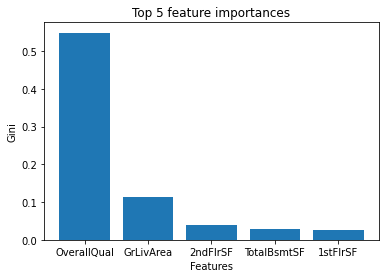

In [106]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

## Стекинг

In [107]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [108]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [109]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV())

In [110]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')


Score on train data 0.9340571350480082
Score on test data 0.8610531758216229
Score on train data with model LinearRegression 0.922108540356243
Score on test data with model LinearRegression 0.8533836050579607
Score on train data with model KNeighborsRegressor 0.7419951520813983
Score on test data with model KNeighborsRegressor 0.6775304068635524
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7755947121665976


Лучше всех справилась Линейная регрессия.
Деревья решений, как и предполагалось, переобучилась. Алгоритм ближайшего соседа тоже не плохо справилась с задачей. 

In [111]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

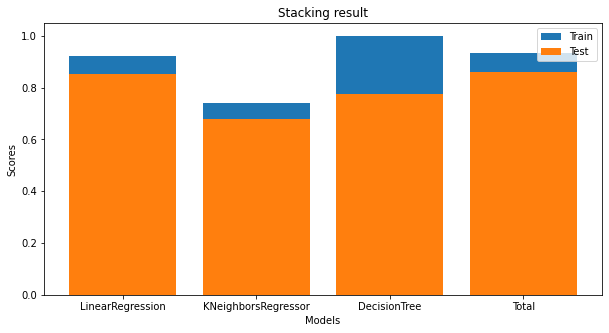

In [112]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

## Бустинг

In [113]:
from lightgbm import LGBMRegressor

In [114]:
lgbm = LGBMRegressor()

lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)



In [115]:
from  sklearn.metrics import r2_score

r2_score( pred, y_test)

0.8801841810298521

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
boosting = GradientBoostingRegressor(n_estimators=100, random_state=10)

In [118]:
boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=10)

In [119]:
boosting.score(X_train, y_train)

0.9709072043308813

In [121]:
boosting.score(X_test, y_test)

0.910729137016184

xgboost

In [122]:
from xgboost import XGBRegressor

In [123]:
xgb = XGBRegressor(random_state=10)

In [124]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [125]:
xgb.score(X_train, y_train)

0.9997776492147783

In [126]:
xgb.score(X_test, y_test)

0.8963757657118135

catboost

In [127]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00


In [128]:
from catboost import CatBoostRegressor

In [129]:
cat = CatBoostRegressor(random_state = 10)

In [130]:
cat.fit(X_train, y_train)

Learning rate set to 0.041084
0:	learn: 75667.1795668	total: 74.4ms	remaining: 1m 14s
1:	learn: 73779.9730790	total: 86.9ms	remaining: 43.4s
2:	learn: 72061.2987781	total: 121ms	remaining: 40.2s
3:	learn: 70188.7580779	total: 140ms	remaining: 34.9s
4:	learn: 68744.5665401	total: 165ms	remaining: 32.9s
5:	learn: 67023.4158819	total: 185ms	remaining: 30.6s
6:	learn: 65599.9419098	total: 207ms	remaining: 29.3s
7:	learn: 64006.0196735	total: 226ms	remaining: 28.1s
8:	learn: 62761.4860108	total: 242ms	remaining: 26.7s
9:	learn: 61322.9418879	total: 256ms	remaining: 25.4s
10:	learn: 60035.4851504	total: 283ms	remaining: 25.5s
11:	learn: 58765.0428470	total: 305ms	remaining: 25.1s
12:	learn: 57549.0663157	total: 319ms	remaining: 24.3s
13:	learn: 56406.0067306	total: 338ms	remaining: 23.8s
14:	learn: 55208.3920879	total: 354ms	remaining: 23.3s
15:	learn: 54084.2492008	total: 375ms	remaining: 23s
16:	learn: 53085.4850901	total: 406ms	remaining: 23.5s
17:	learn: 52025.8436674	total: 424ms	remain

In [131]:
cat.score(X_train, y_train)

0.9959632889791254

In [132]:
cat.score(X_test, y_test)

0.9147536469561793